In [77]:
#Kütüphaneleri Ekleyelim
import numpy as np
import pandas as pd
#Görseleştirme için kullanılan kütüphaneler 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV #GridSearchCV sütunları parçalamak gerekirse diye kullanılır. 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [78]:
data=pd.read_csv("kalp.csv") # Veri setini projeye dahil et 

In [79]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [80]:
data.head() #ilk beş veriyi döndürür

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [81]:
data.info() #veriyi analiz etmek için kullanılır

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [82]:
data.describe().T #Veriyle ilgili istatiksel bilgileri verir

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [83]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [85]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [86]:
data.isnull().sum().sum()

0

<AxesSubplot:>

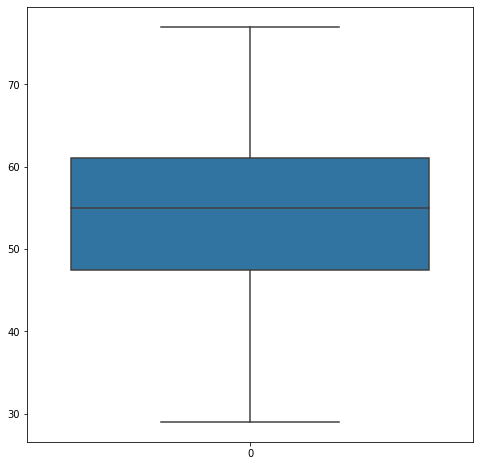

In [87]:
plt.figure(figsize=(8,8)) #boyutu verir
sns.boxplot(data=data.age)

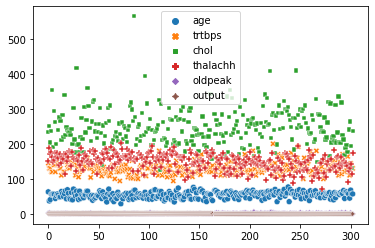

In [88]:
sns.scatterplot(data=data_sayısal)
plt.show()

<AxesSubplot:>

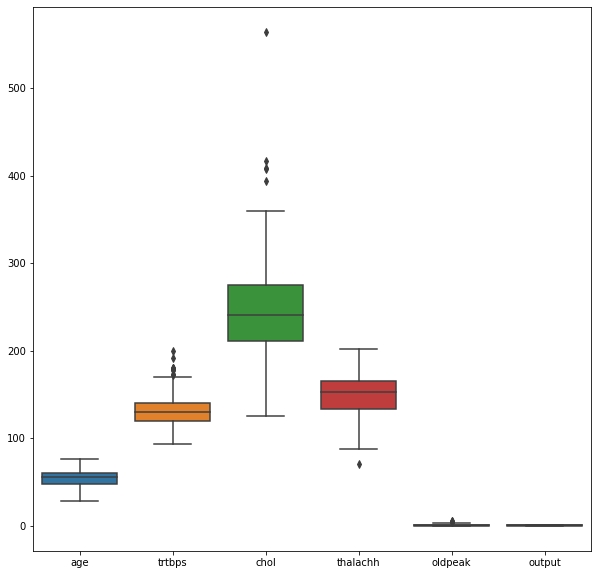

In [89]:
plt.figure(figsize=(10,10)) #boyutu verir
sns.boxplot(data=data_sayısal)

In [90]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [91]:
data.duplicated().sum()

1

In [92]:
data.shape #Dizinin boyutunu verir

(303, 14)

In [93]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [94]:
def kategorik_sayisal():
     print("{} -- {}".format(i,data[i].value_counts().shape[0])) #format kullanarak yazdır

for i in list(data.columns):
    kategorik_sayisal()

age -- 41
sex -- 2
cp -- 4
trtbps -- 49
chol -- 152
fbs -- 2
restecg -- 3
thalachh -- 91
exng -- 2
oldpeak -- 40
slp -- 3
caa -- 5
thall -- 4
output -- 2


In [95]:
kategorik=["sex","cp","fbs","restecg","exng","slp","caa","thall","output"]
data_kat=data.loc[:,kategorik] #Dataframe oluştur
data_kat #kategorik verilerden Dataframe oluştur

,sex,cp,fbs,restecg,exng,slp,caa,thall,output
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,0,3,0
299,1,3,0,1,0,1,0,3,0
300,1,0,1,1,0,1,2,3,0
301,1,0,0,1,1,1,1,3,0


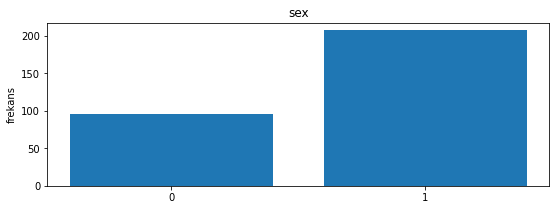

sex 1    207
0     96
Name: sex, dtype: int64


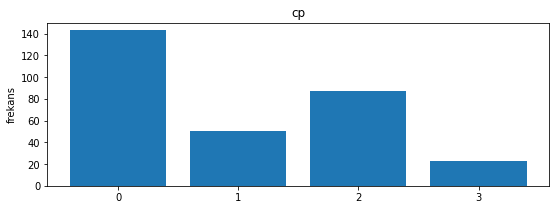

cp 0    143
2     87
1     50
3     23
Name: cp, dtype: int64


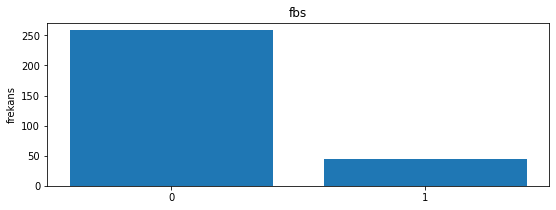

fbs 0    258
1     45
Name: fbs, dtype: int64


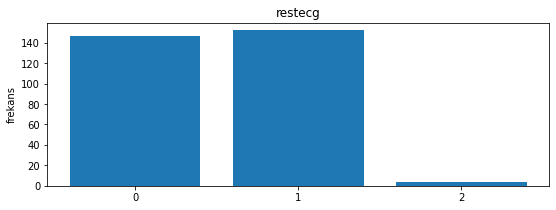

restecg 1    152
0    147
2      4
Name: restecg, dtype: int64


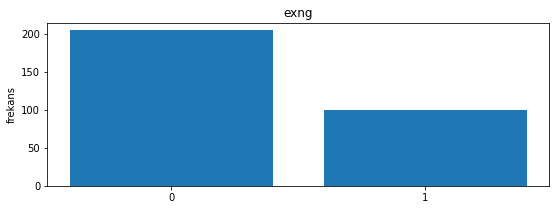

exng 0    204
1     99
Name: exng, dtype: int64


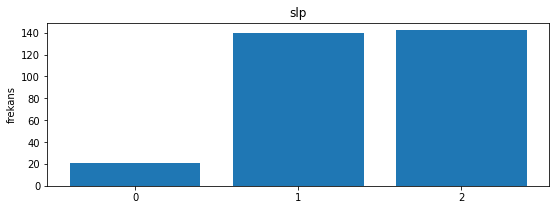

slp 2    142
1    140
0     21
Name: slp, dtype: int64


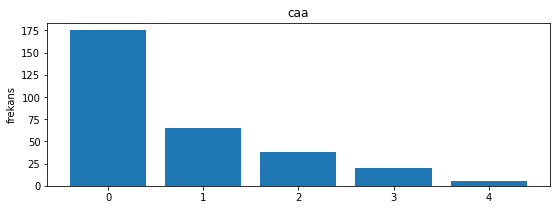

caa 0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64


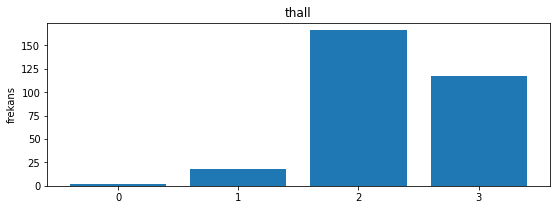

thall 2    166
3    117
1     18
0      2
Name: thall, dtype: int64


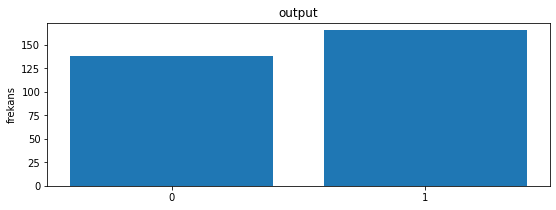

output 1    165
0    138
Name: output, dtype: int64


In [96]:
#kategorik değişkenleri görüntüleyecek fonksiyon
def değişkenler(variable): #buradan bir değer gelicek 
    cat=data[variable]
    sayı=cat.value_counts() #değer sayısı
    plt.figure(figsize=(9,3))
    plt.bar(sayı.index,sayı)
    plt.xticks(sayı.index,sayı.index.values)
    plt.ylabel("frekans")
    plt.title(variable)
    plt.show()
    print(variable,sayı)
    
for i in kategorik:
    değişkenler(i)

In [97]:
sayısal=["age","trtbps","chol","thalachh","oldpeak","output"]
data_sayısal=data.loc[:,sayısal] #Dataframe oluştur
data_sayısal

,age,trtbps,chol,thalachh,oldpeak,output
0,63,145,233,150,2.3,1
1,37,130,250,187,3.5,1
2,41,130,204,172,1.4,1
3,56,120,236,178,0.8,1
4,57,120,354,163,0.6,1
...,...,...,...,...,...,...
298,57,140,241,123,0.2,0
299,45,110,264,132,1.2,0
300,68,144,193,141,3.4,0
301,57,130,131,115,1.2,0


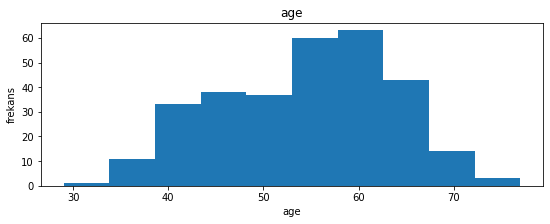

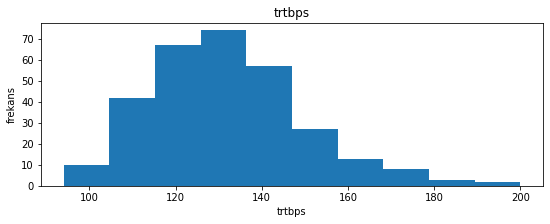

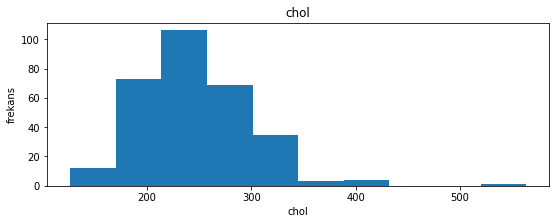

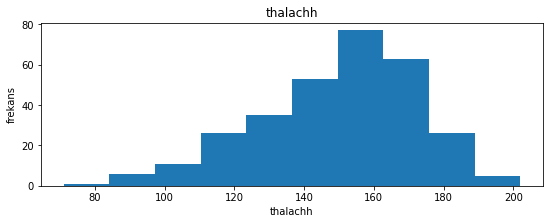

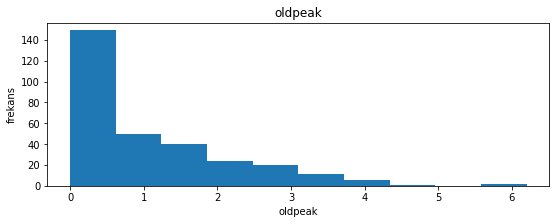

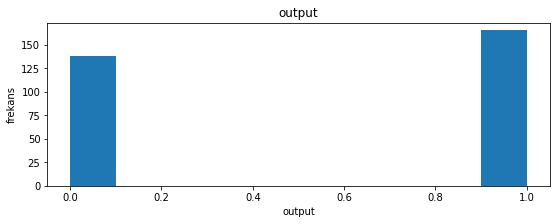

In [98]:
def hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(data[variable])
    plt.xlabel(variable)
    plt.ylabel("frekans")
    plt.title(variable)
    plt.show()

for i in sayısal:
    hist(i)

In [99]:
yeniData=pd.concat([data_sayısal,data_kat],axis=1)
yeniData

,age,trtbps,chol,thalachh,oldpeak,output,sex,cp,fbs,restecg,exng,slp,caa,thall,output
0,63,145,233,150,2.3,1,1,3,1,0,0,0,0,1,1
1,37,130,250,187,3.5,1,1,2,0,1,0,0,0,2,1
2,41,130,204,172,1.4,1,0,1,0,0,0,2,0,2,1
3,56,120,236,178,0.8,1,1,1,0,1,0,2,0,2,1
4,57,120,354,163,0.6,1,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0,0,0,1,1,1,0,3,0
299,45,110,264,132,1.2,0,1,3,0,1,0,1,0,3,0
300,68,144,193,141,3.4,0,1,0,1,1,0,1,2,3,0
301,57,130,131,115,1.2,0,1,0,0,1,1,1,1,3,0


In [100]:
data.output.unique() #Sınıfımdaki elemanların eşsiz olanlarını getir.

array([1, 0], dtype=int64)

In [101]:
data.output.value_counts()

1    165
0    138
Name: output, dtype: int64

C:\Users\Gülşen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


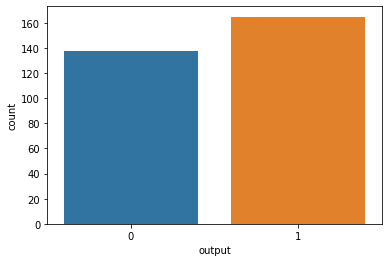

In [133]:
# Sütun grafiği kullanarak dağılımın nasıl olduğuna bakılabilir.
sns.countplot("output",data=data) #sınıfların dağılımını gösterir,kaçar tane olduğunu görsel olarak göstermeyi sağlar.
plt.show()

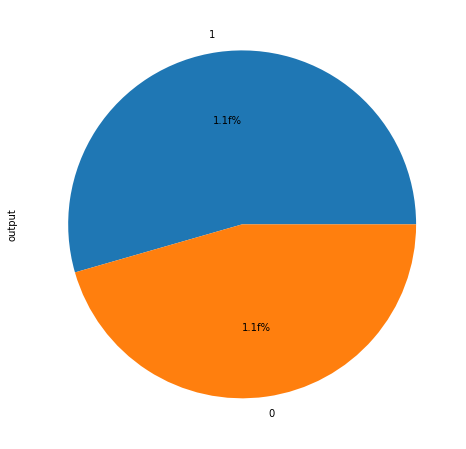

In [134]:
data["output"].value_counts().plot.pie(autopct='1.1f%%',figsize=(10,8)) #sayıyı al ve pasta grafiğinde çiz,boyut belirt
plt.show()

In [104]:
# Korelasyon,verilerin birbiriyle olan ilişkisi hakkında çıkarım yapmamızı sağlar
# sonuç 1'e yaklaştıkça aralarındaki ilişki oranı artar.
data.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


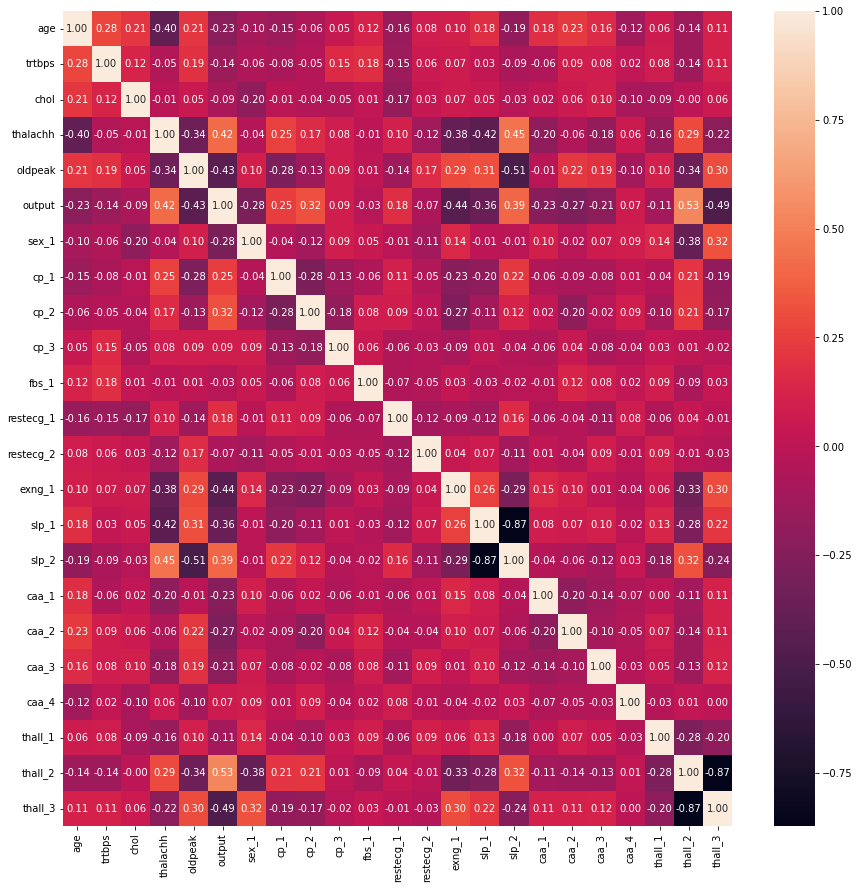

In [135]:
plt.figure(figsize=(15,15)) #boyutu verir
korelasyon=data.corr() #Yapılan analizi kolaylaştırır
sns.heatmap(korelasyon,annot=True,fmt='.2f') #annot=ekranda değerleri yazdırmayı sağlar
plt.show()

In [106]:
#Buraya kadar olan kısım modelimizi tanımamıza yardımcı olmak için yapılan işlemler ve uygulamalardan oluşmakta.

In [107]:
data=pd.get_dummies(data,columns=kategorik[:-1],drop_first=True)
# drop_first=True , eski değerleri atmasını ister 
#Bazı sütunlarda 3 kanal var ve bunu 3'e ayırmak lazım,böylelikle hangi kanalda olduğu anlaşılabilir
data.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [108]:
X=data.drop(["output"],axis=1) #Sınıf hariç data
X 

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
301,57,130,131,115,1.2,1,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1


In [109]:
y=data[["output"]]
y

,output
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [110]:
#normalizasyon işlemi yapılır
scaler=StandardScaler()
X[sayısal[:-1]]=scaler.fit_transform(X[sayısal[:-1]])
X

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,1,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1


In [111]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=44) #veriyi eğitim ve test olarak böl(data 4 parçaya ayrılır)
#train_size=kaça kaç bölüneceğini belirtir,random_state=her seferinde aynu rastgeleliği yapması için kullanılır
knn=KNeighborsClassifier() #Yapıcı metodu çağrılır
knn.fit(X_train,y_train) #eğitim datasını eğit

C:\Users\Gülşen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [112]:
tahmin=knn.predict(X_test)  #tahmin et 
tahmin

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0], dtype=int64)

In [113]:
y_test #gerçek değerler 

,output
94,1
54,1
261,0
172,0
44,1
...,...
214,0
200,0
253,0
23,1


In [114]:
sonuc=knn.score(X_test,y_test) #gerçek değerler ile sonuçlar kıyaslanır
print("model başarısı:",sonuc)

model başarısı: 0.8131868131868132


In [115]:
#K'nın değerine göre başarı oranı değişir
k_değerleri=[] #boş dizi oluştur
for i in range(1,20,2):
    knn=KNeighborsClassifier(n_neighbors=i) #veriyi gezmeyi sağlar 
    knn.fit(X_train,y_train)
    k_değerleri.append(knn.score(X_test,y_test))

C:\Users\Gülşen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Gülşen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Gülşen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Gülşen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:2

In [116]:
k_değerleri

[0.7692307692307693,
 0.8351648351648352,
 0.8131868131868132,
 0.8241758241758241,
 0.8131868131868132,
 0.8241758241758241,
 0.8241758241758241,
 0.8241758241758241,
 0.8131868131868132,
 0.8241758241758241]

In [117]:
#Sınıflandırma raporu mutlaka çalışmalarda kullanılmalıdır.Modelin analizinde yardımcı olur.
sınıflandırmaRaporu=classification_report(y_test,tahmin) #gerçek değerlerine karşılık tahmin edilen değerleri getirir.
print(sınıflandırmaRaporu)

              precision    recall  f1-score   support

           0       0.84      0.74      0.79        43
           1       0.79      0.88      0.83        48

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



In [118]:
doğrulukDegeri=accuracy_score(y_test,tahmin)
print(doğrulukDegeri)

0.8131868131868132


In [119]:
hataMatrisi=confusion_matrix(tahmin,y_test)
print(hataMatrisi)

[[32  6]
 [11 42]]


<AxesSubplot:>

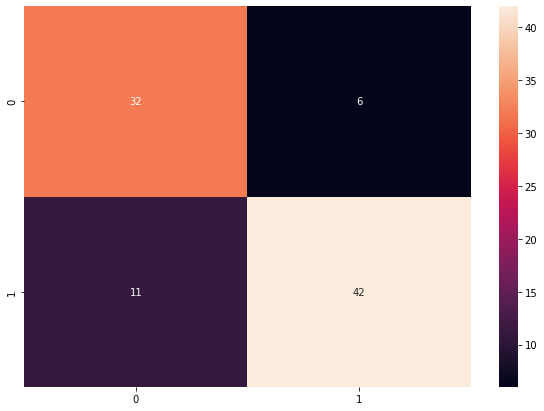

In [120]:
plt.figure(figsize=(10,7))
sns.heatmap(hataMatrisi,annot=True,fmt=".0f")

In [121]:
#farklı algoritmalar denenerek en iyi doğruluk değerini bulan algoritma secilir 

              precision    recall  f1-score   support

           0       0.89      0.79      0.84        43
           1       0.83      0.92      0.87        48

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.86        91
weighted avg       0.86      0.86      0.86        91

Lojistik Regresyon doğruluk değeri: 0.8571428571428571


C:\Users\Gülşen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


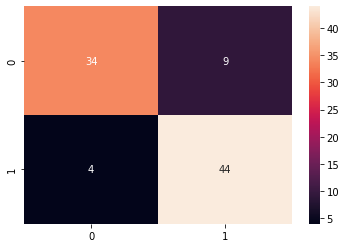

In [122]:
#Logistic Regresyon Algoritması 
logr=LogisticRegression() #yapıcı metot çağrılır
logr.fit(X_train,y_train)

y_pred=logr.predict(X_test) #tahmin et

print(classification_report(y_test,y_pred)) #sınıflandırma raporu 

logDogruluk=accuracy_score(y_test,y_pred)

print("Lojistik Regresyon doğruluk değeri:",logDogruluk)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='.0f') #annot=değerleri yazsın diye verilir
plt.show()

              precision    recall  f1-score   support

           0       0.85      0.77      0.80        43
           1       0.81      0.88      0.84        48

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91

Decision Tree doğruluk değeri: 0.8241758241758241


C:\Users\Gülşen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


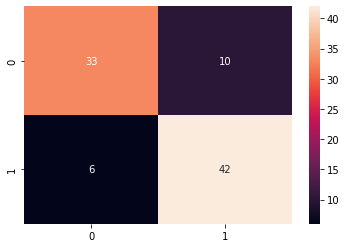

In [123]:
#Destek vektör Algoritması 
from sklearn.svm import SVC #destek vektör algoritmaları
dvm =SVC() #yapıcı metot çağrılır,parametre alabilir 
dvm.fit(X_train,y_train) #eğitim datamı fit et 

y_pred=dvm.predict(X_test) #tahmin et

print(classification_report(y_test,y_pred)) #sınıflandırma raporu 

dvmDogruluk=accuracy_score(y_test,y_pred)

print("Decision Tree doğruluk değeri:",dvmDogruluk)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='.0f') #annot=değerleri yazsın diye verilir
plt.show()

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        43
           1       0.86      0.90      0.88        48

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91

Gaussian NB doğruluk: 0.8681318681318682


C:\Users\Gülşen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


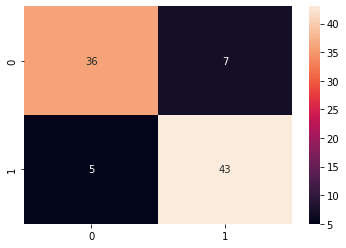

In [124]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train,y_train)

y_pred=gnb.predict(X_test)
print(classification_report(y_test,y_pred))

gnbDogruluk=accuracy_score(y_test,y_pred)
print("Gaussian NB doğruluk:", gnbDogruluk)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

              precision    recall  f1-score   support

           0       0.89      0.79      0.84        43
           1       0.83      0.92      0.87        48

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.86        91
weighted avg       0.86      0.86      0.86        91

Decision Tree doğruluk değeri: 0.8571428571428571


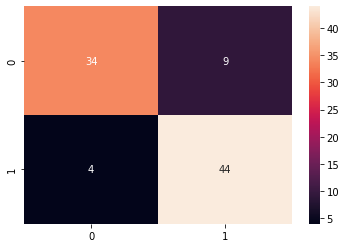

In [125]:
from sklearn.tree import DecisionTreeClassifier
dt =DecisionTreeClassifier() #yapıcı metot çağrılır
dt.fit(X_train,y_train) #eğitim datamı fit et 

y_pred=logr.predict(X_test) #tahmin et

print(classification_report(y_test,y_pred)) #sınıflandırma raporu 

dtDogruluk=accuracy_score(y_test,y_pred)

print("Decision Tree doğruluk değeri:",dtDogruluk)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='.0f') #annot=değerleri yazsın diye verilir
plt.show()

In [126]:
model=KNeighborsClassifier() #yapıcı metodu çağır 
model.fit(X_train,y_train) #eğitim datasını fit et,eğitim ve test datasının eğitim işlemini tamamla

#tahmin yapma zamanı 
#x_testi tahmin edicez, y_test ise gerçek değerlerimiz gibi düşün
#yani veriyi bi şekilde tahmin edicem ve daha sonra y_test ile karşılaştırmasını yapıcam

y_pred=model.predict(X_test) #tahmin edilen değer

print(classification_report(y_test,y_pred)) #sınıflandırma raporunu getir
print(confusion_matrix(y_test,y_pred)) #hata matrisini çizdir 

knnDogruluk=accuracy_score(y_test,y_pred) #test datama göre tahmin edilen değerlerimin sonuçlarını verir
print("knn doğruluk değeri:",knnDogruluk) #doğruluk değerini yazdır 

              precision    recall  f1-score   support

           0       0.84      0.74      0.79        43
           1       0.79      0.88      0.83        48

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91

[[32 11]
 [ 6 42]]
knn doğruluk değeri: 0.8131868131868132


C:\Users\Gülşen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [127]:
modeller = pd.DataFrame({'Model':['Logistik Regresyon',
                                  'Karar Ağaçları',
                                  'Destek Vektör Makinesi',
                                  'K-en yakın komşu',
                                  'Gaussian NB'],
                        'Score':[logDogruluk,dtDogruluk,dvmDogruluk,knnDogruluk,gnbDogruluk]})

In [128]:
modeller

,Model,Score
0,Logistik Regresyon,0.857143
1,Karar Ağaçları,0.857143
2,Destek Vektör Makinesi,0.824176
3,K-en yakın komşu,0.813187
4,Gaussian NB,0.868132


In [129]:
modeller.sort_values(by='Score',ascending=False) #büyükten küçüğe sıralar 

,Model,Score
4,Gaussian NB,0.868132
0,Logistik Regresyon,0.857143
1,Karar Ağaçları,0.857143
2,Destek Vektör Makinesi,0.824176
3,K-en yakın komşu,0.813187


<BarContainer object of 5 artists>

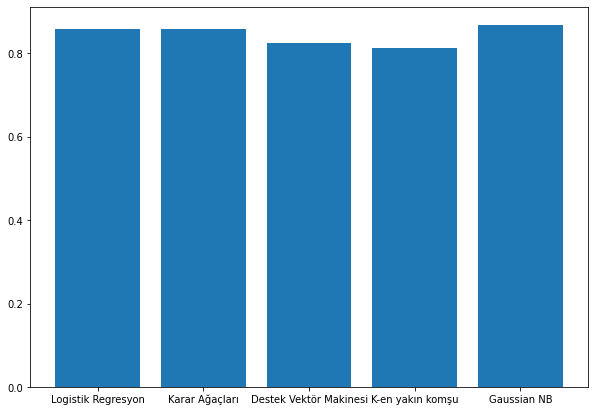

In [130]:
plt.figure(figsize=(10,7))
plt.bar(modeller.Model,modeller.Score)